## BE Project
## Group 16

### A recommendation system for smart journal application
This recommendation system will be used with the emotion predition system.

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
from sklearn import preprocessing
from sklearn.neighbors import NearestNeighbors
import os

### Dataset
The dataset is taken from the following article: https://towardsdatascience.com/predicting-the-music-mood-of-a-song-with-deep-learning-c3ac2b45229e. 
The author has created dataset by searching on Spotify some playlists with different music tracks based on these 4 labels and concatenating all these tracks into the main data frame labeled by each mood. 
The main data has 18 columns but for information reduction used features are Length, Danceability, Acousticness, Energy, Instrumentalness, Liveness, Valence, Loudness, Speechiness and Tempo because they have more influence on emotion classification of the tracks.


### Dataset preparation and EDA

In [2]:
path = os.path.join(os.getcwd(),"../static/dataset/data_moods.csv")
path = os.path.abspath(path)
data = pd.read_csv(path)
data.head(10)

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,1982-10-27,68,379266,0.866,0.137000,0.7300,0.000000,0.0843,0.625,-8.201,0.0767,118.523,5,4,Happy
1,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,2007-04-16,43,318800,0.381,0.018900,0.8320,0.196000,0.1530,0.166,-5.069,0.0492,120.255,8,4,Sad
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,2006-11-06,60,217946,0.346,0.913000,0.1390,0.000077,0.0934,0.116,-15.326,0.0321,136.168,0,4,Sad
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,1984-08-21,2,233000,0.466,0.089000,0.4380,0.000006,0.1130,0.587,-12.858,0.0608,193.100,4,4,Happy
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,2004-01-01,60,268000,0.419,0.001710,0.9320,0.000000,0.1370,0.445,-3.604,0.1060,169.881,1,4,Energetic
5,A Burden to Bear,A Burden to Bear,Emmanuelle Rimbaud,67DOFCrkcQaLp5yhzF8Y8N,2020-07-31,27,129410,0.394,0.995000,0.0475,0.955000,0.1050,0.172,-26.432,0.0720,71.241,6,5,Calm
6,A La Plage,A La Plage,Ron Adelaar,79NmiFAgcXUIVDGfCWDdWF,2020-08-07,29,141888,0.504,0.994000,0.0584,0.956000,0.1150,0.553,-20.461,0.0516,134.209,5,4,Calm
7,A Little Less Conversation - JXL Radio Edit Remix,Elvis 75 - Good Rockin' Tonight,Elvis Presley,4l2hnfUx0esSbITQa7iJt0,2009-12-28,1,211173,0.586,0.000155,0.9350,0.277000,0.1590,0.580,-9.386,0.0482,114.997,4,4,Happy
8,A Place for My Head,Hybrid Theory (Bonus Edition),Linkin Park,5rAxhWcgFng3s570sGO2F8,2000-10-24,68,184640,0.603,0.014400,0.9080,0.000000,0.6710,0.457,-5.254,0.1840,133.063,11,4,Energetic
9,ATTACK,A Beautiful Lie + 30 Seconds To Mars,Thirty Seconds To Mars,6QxTWEvzcJljVZaeTzuHF1,2007-05-15,0,189200,0.331,0.003440,0.8760,0.000835,0.7320,0.299,-1.894,0.0603,175.009,5,4,Energetic


In [3]:
data.shape

(686, 19)

In [4]:
data.isna().sum()

name                0
album               0
artist              0
id                  0
release_date        0
popularity          0
length              0
danceability        0
acousticness        0
energy              0
instrumentalness    0
liveness            0
valence             0
loudness            0
speechiness         0
tempo               0
key                 0
time_signature      0
mood                0
dtype: int64

In [5]:
data.mood.unique()

array(['Happy', 'Sad', 'Energetic', 'Calm'], dtype=object)

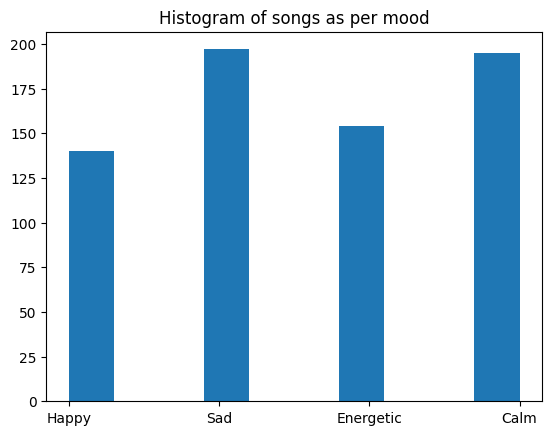

In [6]:
plt.hist(data.mood)
plt.title('Histogram of songs as per mood')
plt.show()

In [7]:
label_encoder = LabelEncoder()
data.mood = label_encoder.fit_transform(data['mood'])
  
data['mood'].unique()

array([2, 3, 1, 0])

C:\Users\Admin\AppData\Local\Temp\ipykernel_10264\3121467392.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='YlGnBu', vmin=-1, vmax=1, center=0, ax=ax)


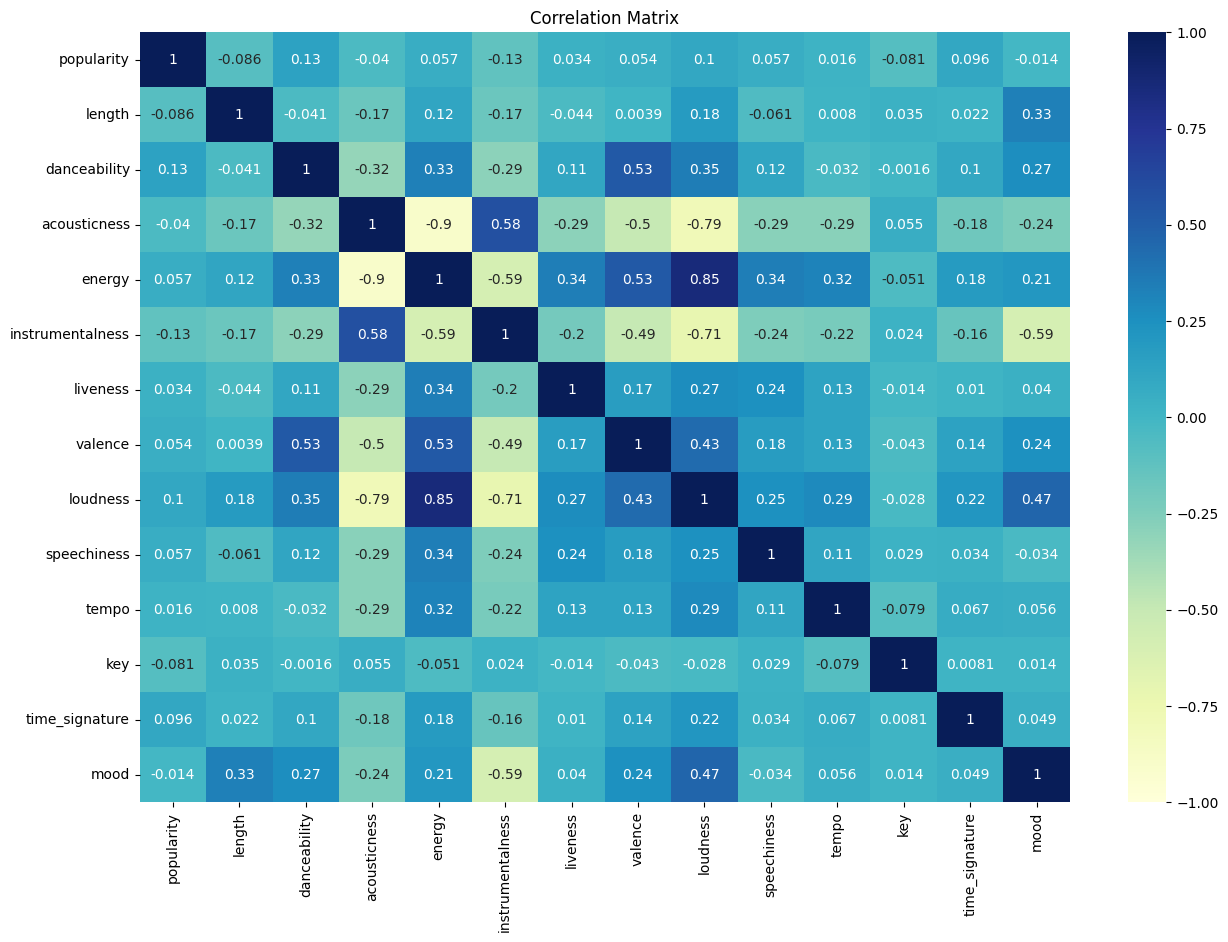

In [8]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu', vmin=-1, vmax=1, center=0, ax=ax)
plt.title('Correlation Matrix')
plt.show()

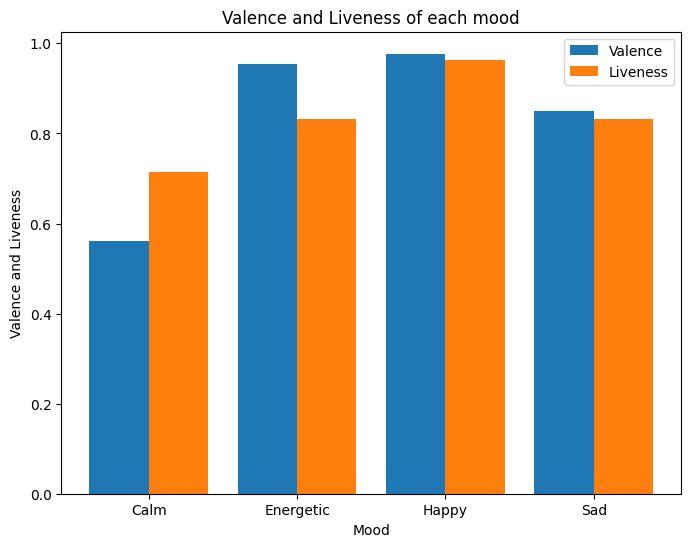

In [9]:
fig, ax = plt.subplots(figsize=(8,6))
X = [ 'Calm', 'Energetic','Happy', 'Sad']

X_axis = np.arange(len(X))
  
plt.bar(data.mood - 0.2, data.valence, 0.4, label = 'Valence')
plt.bar(data.mood + 0.2, data.liveness, 0.4, label = 'Liveness')
  
plt.xticks(X_axis, X)
plt.xlabel("Mood")
plt.ylabel("Valence and Liveness")
plt.title("Valence and Liveness of each mood")
plt.legend()
plt.show()

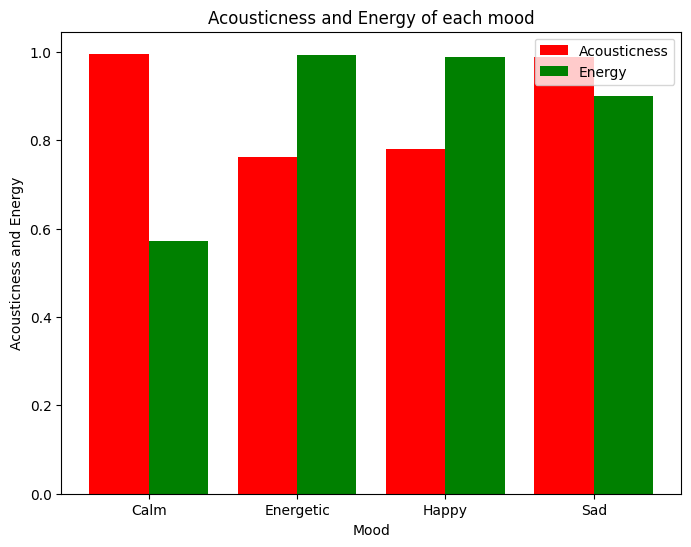

In [10]:
fig, ax = plt.subplots(figsize=(8,6))
X = [ 'Calm', 'Energetic','Happy', 'Sad']

X_axis = np.arange(len(X))
  
plt.bar(data.mood - 0.2, data.acousticness, 0.4, label = 'Acousticness', color='red')
plt.bar(data.mood + 0.2, data.energy, 0.4, label = 'Energy', color='green')
  
plt.xticks(X_axis, X)
plt.xlabel("Mood")
plt.ylabel("Acousticness and Energy")
plt.title("Acousticness and Energy of each mood")
plt.legend()
plt.show()

In [11]:
feature_cols = ['energy','loudness','valence','danceability','acousticness','instrumentalness','speechiness','tempo', 'mood']

In [12]:
normalized = preprocessing.normalize(data[feature_cols])
normalized = pd.DataFrame(normalized,columns=feature_cols)

In [13]:
normalized['mean']  = normalized.mean(axis =1)

### Building recommender

In [14]:
# Finding Out If Song Is Present In DataSet 
def getSongIndex(songName):
    
    bool = data['name'].isin([songName])
    # Getting Index Of Song If Present
    sindex = bool[bool==True].index[0]
    return sindex

Distances that can be considered are: cosine, euclidean, linear kernal

In [15]:
linear_kernal = linear_kernel(normalized)
euclidian = euclidean_distances(normalized)
cosine = cosine_similarity(normalized)

Function for recommendation based on similarity method selected 

In [16]:
def recommendation(m_name,model =linear_kernal):
    # default model is linear kernal 
    SongIndex = getSongIndex(m_name)
    score = list(enumerate(model[SongIndex]))
    sim_score = sorted(score,key = lambda x:x[1],reverse = True)
    sim_score = sim_score[1:11]
    Index = [i[0] for i in sim_score]
    return data["name"].iloc[Index]

Getting recommendation for given song

In [17]:
recommendation('Alison', linear_kernal)

44                              Bad Feeling
518                      Such Great Heights
535              Teardrop - Remastered 2006
130                    Dark Side of the Gym
127                 Dancing With Your Ghost
128               Dancing With an Astronaut
249    I Can't Help (with Sarcastic Sounds)
322                          London Thunder
327                              Losing You
57                        Better Than Today
Name: name, dtype: object

In [18]:
recommendation('Alison', euclidian)

417    Piano Sonata No. 14 In C Sharp Minor, Op. 27-2...
545                                           The Choice
219    Gottes Zeit ist die allerbeste Zeit, BWV 106: ...
371                                                Night
402                                      Out of the Deep
385                                         October Rain
43                                                 Back+
140                                            Dew Drops
48                                               Balloon
564             The Snail’s Teachings II: The Wonders of
Name: name, dtype: object

In [19]:
recommendation('Alison', cosine)

280                                     Jupiter 4
194    Fly - King Britt's Fhloston Paradigm Remix
325                                       Lorelei
29                                         Anchor
676                           no song without you
560                                The Mind's Eye
518                            Such Great Heights
540                                 Telling Tales
130                          Dark Side of the Gym
598                                        Unmade
Name: name, dtype: object

### Using KNN

In [20]:
feature_cols = data.drop([
'name','album','artist','id','release_date'], axis=1)
X = feature_cols
X

,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,68,379266,0.866,0.13700,0.7300,0.000000,0.0843,0.6250,-8.201,0.0767,118.523,5,4,2
1,43,318800,0.381,0.01890,0.8320,0.196000,0.1530,0.1660,-5.069,0.0492,120.255,8,4,3
2,60,217946,0.346,0.91300,0.1390,0.000077,0.0934,0.1160,-15.326,0.0321,136.168,0,4,3
3,2,233000,0.466,0.08900,0.4380,0.000006,0.1130,0.5870,-12.858,0.0608,193.100,4,4,2
4,60,268000,0.419,0.00171,0.9320,0.000000,0.1370,0.4450,-3.604,0.1060,169.881,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,36,123066,0.402,0.96100,0.2360,0.919000,0.0921,0.1460,-20.615,0.0603,129.736,0,3,0
682,5,435080,0.452,0.75700,0.5150,0.120000,0.1400,0.1910,-7.351,0.0255,80.537,11,4,3
683,87,169265,0.642,0.78600,0.3740,0.000000,0.0906,0.0799,-9.386,0.0545,124.099,4,4,3
684,76,219146,0.561,0.91300,0.0848,0.000026,0.1120,0.2060,-15.099,0.0404,102.128,2,4,3


In [21]:
neigh = NearestNeighbors(n_neighbors=10, algorithm='brute')
neigh.fit(X)
X

,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,68,379266,0.866,0.13700,0.7300,0.000000,0.0843,0.6250,-8.201,0.0767,118.523,5,4,2
1,43,318800,0.381,0.01890,0.8320,0.196000,0.1530,0.1660,-5.069,0.0492,120.255,8,4,3
2,60,217946,0.346,0.91300,0.1390,0.000077,0.0934,0.1160,-15.326,0.0321,136.168,0,4,3
3,2,233000,0.466,0.08900,0.4380,0.000006,0.1130,0.5870,-12.858,0.0608,193.100,4,4,2
4,60,268000,0.419,0.00171,0.9320,0.000000,0.1370,0.4450,-3.604,0.1060,169.881,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,36,123066,0.402,0.96100,0.2360,0.919000,0.0921,0.1460,-20.615,0.0603,129.736,0,3,0
682,5,435080,0.452,0.75700,0.5150,0.120000,0.1400,0.1910,-7.351,0.0255,80.537,11,4,3
683,87,169265,0.642,0.78600,0.3740,0.000000,0.0906,0.0799,-9.386,0.0545,124.099,4,4,3
684,76,219146,0.561,0.91300,0.0848,0.000026,0.1120,0.2060,-15.099,0.0404,102.128,2,4,3


In [22]:
Y = data.iloc[getSongIndex('Alison')]
Y = Y.drop([
'name','album','artist','id','release_date'])

test_Y = pd.DataFrame(data=Y, index=None)
test_Y = test_Y.T
test_Y

,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
18,0,231893,0.279,0.00957,0.423,0.837,0.128,0.291,-12.06,0.038,101.571,4,4,3


In [23]:
distances, indices = neigh.kneighbors(test_Y)

In [24]:
print('Recommendation:\n')
for i in range(1, len(distances.flatten())):
  print('{0}: {1}, with a distance of {2}.'.format(i, data['name'].iloc[indices.flatten()[i]],distances.flatten()[i]))

Recommendation:

1: Seven Nation Army, with a distance of 36.017858208454264.
2: While the Rest of the World Sleeps, with a distance of 69.73422122898195.
3: Groove Is in the Heart, with a distance of 127.07826749783563.
4: Calm Wilderness, with a distance of 178.47680117949542.
5: Inside the Fire, with a distance of 320.38564980287333.
6: Watersong, with a distance of 389.03315622979767.
7: Always, with a distance of 700.5379577797496.
8: Honey, This Mirror Isn't Big Enough for the Two of Us, with a distance of 798.8766109263486.
9: Crash, with a distance of 1089.7683306677466.
